Dimitra Zuccarelli (20072495)

# Iris Flowers Clustering

In [6]:
from sklearn import datasets, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabaz_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set(rc={'figure.figsize':(13, 6)})

## Loading the dataset

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
outcomes = iris.target_names
features = iris.feature_names

# Construct a dataframe for managing the dataset
df = pd.DataFrame(np.c_[iris['data'], iris['target']],
                     columns=iris['feature_names'] + ['class'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# K-Means Clustering
To determine the natural clustering of the dataset, `sklearn.cluster.KMeans` is used for 13 different values of `k`, from 2 to 15. From here the CH Index (described below) is calculated for each cluster. The "correct" number of clusters `k` is plotted, which is chosen based on the `k` that outputs the highest CH Index. 

## Within cluster & between cluster distances
The between-cluster (or inter-cluster) distance between two clusters is calculated by taking the distances from every cluster `k` to the centroid of the entire dataset, multipled by the number of items in that cluster. The within cluster (or intra-cluster) distance measures the distance between any pair of elements in cluster `k`. 

**Within cluster distance**: 
$$\large{W_k = \sum_{i=1}^{k} \sum_{x_j \in C_i} d(x_j, \overline{x_i}), \; where \; \overline{x_i} = \frac{1}{n_i} \sum_{x_j \in C_i} x_j}$$
Can also use `sklearn.cluster.KMeans.inertia_`.

**Between cluster distance**:
$$\large{B_k = \sum_{i=1}^{k} n_i * d(\overline{x_i}, \overline{x}), \; where \; \overline{x} = \frac{1}{2} \sum_{i=1}^{n} x_i}$$

## CH Index
The Calinski-Harabasz Index (or Variance Ratio criterion) is a ratio between the within cluster and between cluster distances, which helps evaluate the number of clusters `k` in a dataset to use for cluster analysis. Can also use `sklearn.metrics.calinski_harabaz_score`, which calculates the within cluster and between cluster distances for you. 

$$\large{CH(k) = \frac{B(k)}{(k - 1)} * \frac{(n - k)}{W(k)}}$$

In [8]:
ch = []
within = []
between = []

# Get cluster center for 1 cluster
k_means = KMeans(n_clusters=1, random_state=0)
k_means.fit_predict(X)
mean = k_means.cluster_centers_

for k in range(2, 15):
    # within cluster distance
    k_means = KMeans(n_clusters=k, random_state=0)
    y_kmeans = k_means.fit_predict(X)
    w_dist = k_means.inertia_
    within.append(w_dist)
    
    # Get the numbet of clusters
    clusters = np.unique(k_means.labels_)
    
    # Between cluster distance
    b_dist = 0
    n_samples = len(X)
    n_clusters = len(clusters)
    
    for n in clusters:
        cluster_k = X[y_kmeans == n]
        mean_k = np.mean(cluster_k, axis=0)
        b_dist += len(cluster_k) * np.sum((mean_k - mean) ** 2)
        
    # Get the CH Score
    ch_score = b_dist * (n_samples - n_clusters) / (w_dist * (n_clusters - 1))
    # ch_score = (b_dist / (n_clusters - 1)) / (w_dist / (n_samples - n_clusters))
    
    between.append(b_dist)
    ch.append(ch_score)

In [9]:
print("Within cluster distances:")
print(within)

print("\nBetween cluster distances:")
print(between)

print("\nCH Indices:")
print(ch)

Within cluster distances:
[152.34795176035792, 78.85144142614601, 57.228473214285714, 46.472230158730156, 39.03998724608725, 34.299712121212124, 30.063110617452725, 28.27172172856384, 26.094324740540415, 24.74251725970109, 22.79398246748092, 21.690983282068807, 20.33545332204028]

Between cluster distances:
[529.0226482396422, 602.5191585738538, 624.1421267857143, 634.8983698412698, 642.3306127539126, 647.0708878787877, 651.3074893825471, 653.0988782714361, 655.2762752594598, 656.628082740299, 658.5766175325192, 659.6796167179314, 661.0351466779597]

CH Indices:
[513.9245459802768, 561.6277566296199, 530.7658081872852, 495.24341371472735, 473.8506068330425, 449.62057135090936, 439.48338579741176, 407.1512814129129, 390.62848360278895, 368.88446936463487, 362.4703595232042, 347.2107369650205, 340.06837722692865]


### Plotting within and between cluster distances

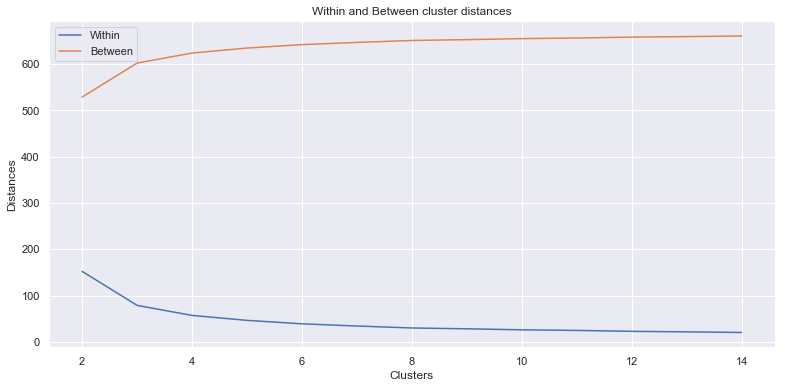

In [10]:
ax = sns.lineplot(range(2, 15), within, label="Within")
ax = sns.lineplot(range(2, 15), between, label="Between")
ax.set(xlabel='Clusters', ylabel='Distances', title="Within and Between cluster distances")
plt.show()

### Plotting the CH Index

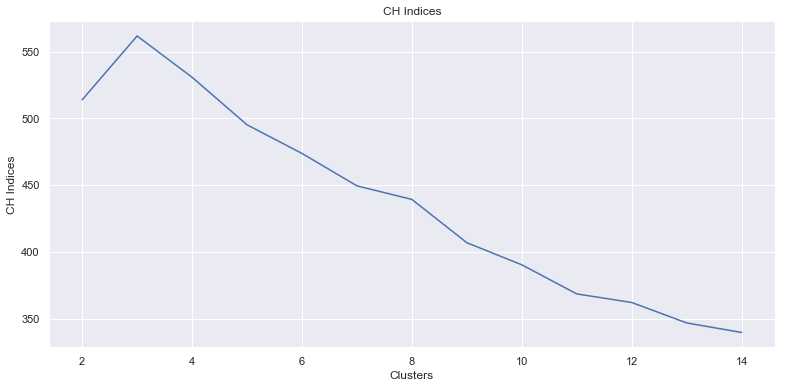

In [11]:
ax = sns.lineplot(range(2, 15), ch)
ax.set(xlabel='Clusters', ylabel='CH Indices', title="CH Indices")
plt.show()

Shows a maximum for `k = 3`.

### CH Indices with `calinski_harabaz_score`

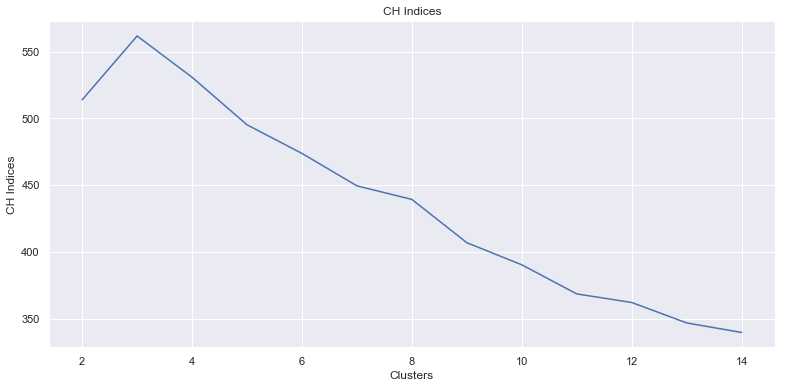

In [12]:
ch = []
for k in range (2, 15):
    k_means = KMeans(n_clusters=k, random_state=0)
    y_kmeans = k_means.fit_predict(X)

    labels = k_means.labels_
    ch.append(calinski_harabaz_score(X, labels))

ax = sns.lineplot(range(2, 15), ch)
ax.set(xlabel='Clusters', ylabel='CH Indices', title="CH Indices")
plt.show()

Shows a maximum for `k = 3`.

### Plotting the clusters (k=3)

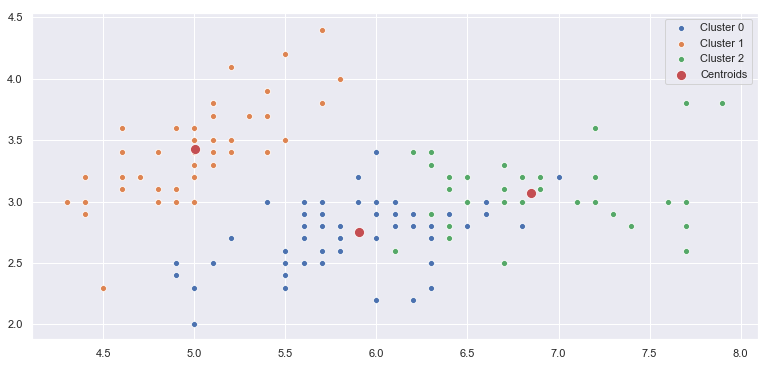

In [19]:
# Get the clusters
k_means = KMeans(n_clusters=3, random_state=0)
y_kmeans = k_means.fit_predict(X)
clusters = np.unique(k_means.labels_)

# Plot the clusters
for n in clusters:
    sns.scatterplot(X[y_kmeans == n, 0], X[y_kmeans == n, 1], label="Cluster " + str(n))

# Plot the centroids
sns.scatterplot(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, label="Centroids")
plt.show()

## Plotting different values of `k`
(For curiosity sake)

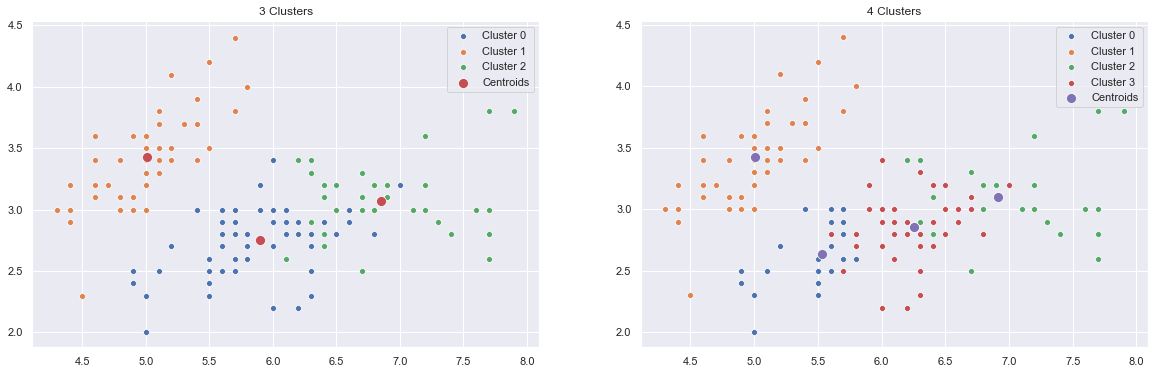

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

for k in range(3, 5):
    index = k-3
    
    # Get the clusters
    k_means = KMeans(n_clusters=k, random_state=0)
    y_kmeans = k_means.fit_predict(X)
    clusters = np.unique(k_means.labels_)
    
    # Plot the clusters
    for n in clusters:
        sns.scatterplot(X[y_kmeans == n, 0], X[y_kmeans == n, 1], label="Cluster " + str(n), ax=ax[index])
    
    # Plot the centroids
    ax[index].set(title=str(k) + " Clusters")
    sns.scatterplot(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, label="Centroids", ax=ax[index])

# Hierarchical Clustering


The `sklearn.cluster.AgglomerativeClustering` function recursively merges the pair of clusters that minimally increases a given linkage distance. In this example, the CH scores for four different linkage types are calculated:

- `ward`: minimizes the variance of the clusters being merged
- `average`: uses the average of the distances of each observation of the two clusters
- `complete`: uses the maximum distances between all observations of the two clusters
- `single`: uses the minimum of the distances between all observations of the two clusters

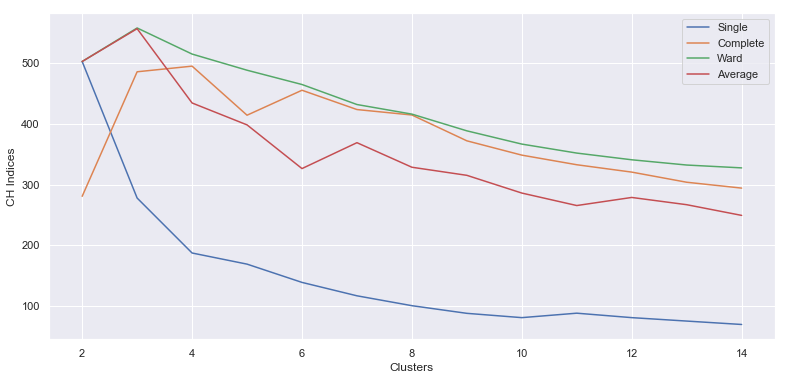

In [30]:
ch_single = []
ch_complete = []
ch_ward = []
ch_avg = []

for k in range (2, 15):
    # Complete linkage 
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')  
    cluster.fit_predict(X)  
    labels = cluster.labels_
    ch_complete.append(calinski_harabaz_score(X, labels))
    
    # Single linkage 
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')  
    cluster.fit_predict(X)  
    labels = cluster.labels_
    ch_single.append(calinski_harabaz_score(X, labels))
    
    # Ward linkage 
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  
    cluster.fit_predict(X)  
    labels = cluster.labels_
    ch_ward.append(calinski_harabaz_score(X, labels))
    
    # Average linkage 
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')  
    cluster.fit_predict(X)  
    labels = cluster.labels_
    ch_avg.append(calinski_harabaz_score(X, labels))

# Plot the graph
ax = sns.lineplot(range(2, 15), ch_single, label = "Single")
ax = sns.lineplot(range(2, 15), ch_complete, label = "Complete")
ax = sns.lineplot(range(2, 15), ch_ward, label = "Ward")
ax = sns.lineplot(range(2, 15), ch_avg, label = "Average")

ax.set(xlabel='Clusters', ylabel='CH Indices')
ax.legend()
plt.show()

### Choosing number of clusters `k`
* Single: `k = 2`
* Average, Ward: `k = 3`
* Complete: `k = 4`

### Plotting a dendrogram for a sample

Plotting the hierarchical clustering for a sample of `40` observations as a dendrogram. From the scipy docs:


        The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The height of the top of the U-link is the distance between its children clusters. It is also the cophenetic distance between original observations in the two children clusters.

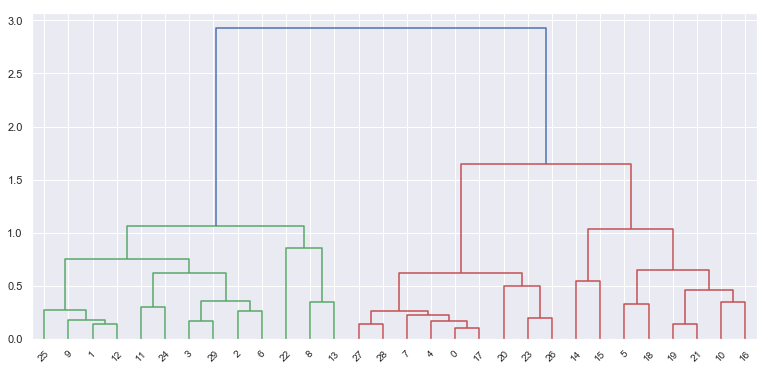

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage = linkage(X[:30], 'ward')
dendrogram(linkage)

plt.show()